<a href="https://colab.research.google.com/github/GruveJL/MVP3_PUC_RIO/blob/main/MVP_3_Regressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MVP 3 - Machine Learning & Analytics**

**Nome:** Juan Carlos da Silva Rodrigues de Lima

**Matrícula:** 4052025000033

# **Proposta do Projeto**

A ideia do projeto é fazer um MVP para praticar a aplicação de um modelo de Machine Learning em um Banco de Dados. O foco aqui será a exploração e compreensão dos dados, além de testar alguns tipos de modelos, avaliando seus resultados e entendendo qual deles teve mais "*fit*" ao conjunto dos dados disponíveis.

Os Arquivos e pastas estão hospedados no Google Drive nos links abaixo:
* [Arquivo](https://colab.research.google.com/drive/1c4lABjnrupla1RFAvOfg6f-5tRqFp-dt?usp=drive_link)
* [Dataset Original](https://drive.google.com/file/d/14wEv9mRXmUyT0z_TNFRF_O95gcS0Li8c/view?usp=drive_link)
* [Pasta do Projeto no Drive](https://drive.google.com/drive/folders/1bQO6TRw0ohoOZPXk2MxwIzeh3zHjIxDA?usp=drive_link)

E como referência neste repo do Github

#**Dataset**

Usarei aqui um conjunto de dados reduzido em tamanho para que os devidos testes com os modelos sejam mais performáticos. A fonte de dados foi o repositório  [Kaggle](https://www.kaggle.com/) um site com diversas bases de dados disponíveis para tratamento e aplicação de análises e modelos.

O Banco de dados escolhido relaciona o preço do plano de saúde (insurence) cobrado nos Estados Unidos da América com algumas características do assegurado.

O Dataset pode ser encontrado [**aqui**](https://www.kaggle.com/datasets/mosapabdelghany/medical-insurance-cost-dataset)

## Seleção e Atributos de Dados

O Dataset possui **1338** entradas com **7 colunas** incluindo a coluna de valor do seguro.

Para nosso projeto usaremos todas as colunas, segue descrição:
* **age** - Idade do beneficiário do plano. | Int
* **sex** - Gênero do beneficiário. | String
* **bmi** - IMC (Índice de Massa Corporal), métrica de correlacionamento entre massa e altura corporal, medida dividindo peso pela altura ao quadrado. | Float
* **children** - Quantidade de crianças cobertas pelo plano. | Int
* **smoker** - Situação de fumante do beneficiário. | String
* **region** - Região dos EUA no qual reside o beneficiário. | String
* **charges** - Custo do plano para o beneficiário em questão. | Float


# **Hipóteses do Problema**

Temos dois tipos de problema que tentarei resolver:
* Entender se apenas com esses dados é possível treinar um modelo para prever o custo de um plano de saúde.

* Avaliar a diferença de preço dadas as categorias.


### Hipóteses

O primeiro problema é uma questão exploratória, essa base é uma das mais baixadas na plataforma, diversos trabalhos foram realizados e a dúvida é se conseguimos com poucas variáveis um modelos acertivo.

Já o segundo, tentaremos entender se há uma correlação explicita entre as variáveis e o senso comum sobre elas, por exemplo que pessoas fumantes, ou com muitos filhos, ou até mesmo as do gênero feminino terem uma conta de plano maior por aprensentarem mais riscos as seguradoras.

Por ser um Dataset pequeno usarei todos os dados disponíveis exceto linhas julgadas necessárias serem retiradas pelo processo de tratamento dos dados.

### Tipo de Problema

Trata-se de um caso clássico de Regressão Linear, no qual tentaremos prever os preços dadas as caracteristicas disponíveis, a ideia aqui será testar pelo menos 3 tipos de modelos, entender qual deles tem melhores resultados e a partir deles tirar as devidas conclusões sob as hipóteses apresentadas.

# Importação das Bibliotecas Necessárias e Carga de Dados

Aqui importaremos todas as Bibliotecas necessárias e as Bases a serem utilizadas.

In [2]:
# Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

A base foi baixada do Kaggle e hospedada no drive com acesso público.

In [3]:
# Import biblioteca para consumo do Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Url do caminho do arquivo no Drive
url_insure = "/content/drive/MyDrive/MVP3/Datasets/insurance.csv"

In [5]:
# Importanto os Dataset
dataset_insure = pd.read_csv(url_insure, delimiter=',');

In [6]:
# Preview dos Dados
dataset_insure.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# **Tratamentos**

Aqui iremos entender um pouco melhor o Dataset, ver dados faltantes e fazer alguns tratamentos para deixa a base de dados melhor utilizável.

Aparentemente essa é uma base já limpa, portanto serão feitos pequenos ajustes para assegurar a qualidade dos dados.

Iniciaremos com as validações padrão, entender os tipos dos dados, se há muitos nulos em alguma coluna, se há repetições, e avaliar um possivel ajuste nas variáveis categóricas.

In [7]:
# Describe dos dados
dataset_insure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Tipos de dados validados conforme esperado.

In [8]:
# Entradas Únicas
dataset_insure.nunique()

,0
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


Como visto anteriormente temos 7 colunas, das quais duas tem apenas dois valores distintos, a coluna "*sex*" (male, female) e a coluna "*smoker*" (yes, no), irei substituir essas colunas por colunas com valores numéricos (1, 0) apenas para facilitar a visualização e ajudar em otimizações futuras.

In [9]:
#Substituindo valores coluna smoker
dataset_insure["smoker"] = dataset_insure["smoker"].replace({"yes": 1, "no": 0}).astype(int)

#Substituindo valores coluna smoker
dataset_insure["sex"] = dataset_insure["sex"].replace({"male": 1, "female": 0}).astype(int)

/tmp/ipython-input-1985893109.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset_insure["smoker"] = dataset_insure["smoker"].replace({"yes": 1, "no": 0}).astype(int)
/tmp/ipython-input-1985893109.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset_insure["sex"] = dataset_insure["sex"].replace({"male": 1, "female": 0}).astype(int)


In [10]:
# Validando mudança
dataset_insure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 73.3+ KB


Agora irei validar linhas duplicadas, essa etapa será penas para conhecimento, já que a base não possui um identificador único por linha, entretando é importante saber se existem linhas exatamente iguais na base.

In [11]:
# Aplicando método Duplicated
duplicados = dataset_insure[['age','sex','bmi','children','smoker','region','charges']].duplicated()

# soma dos duplicados
num_duplicados = duplicados.sum()

print("Número de Linhas Duplicadas:", num_duplicados)

Número de Candidatos Duplicados: 1


Ao que parece temos uma linha duplicada

In [14]:
# Mostrar as linhas duplicadas
linhas_duplicadas = dataset_insure[dataset_insure[['age','sex','bmi','children','smoker','region','charges']].duplicated(keep=False)]

print(linhas_duplicadas)

     age  sex    bmi  children  smoker     region    charges
195   19    1  30.59         0       0  northwest  1639.5631
581   19    1  30.59         0       0  northwest  1639.5631


Como nesse caso há apenas duas linhas que possuem exatamente o mesmo valor, irei manter, entretanto me ocorreu a dúvida se podem haver linhas com características de beneficiário iguais, mas com valores de cobrança diferentes, é o que iremos verificar:

In [15]:
# Aplicando método Duplicated nas colunas de caracteristicas
duplicados_sem_valor = dataset_insure[['age','sex','bmi','children','smoker','region']].duplicated()

# soma dos duplicados
num_duplicados = duplicados_sem_valor.sum()

print("Número de Linhas Duplicadas:", num_duplicados)

Número de Linhas Duplicadas: 3


In [16]:
# Mostrar as linhas duplicadas
linhas_duplicadas_sem_valor = dataset_insure[dataset_insure[['age','sex','bmi','children','smoker','region',]].duplicated(keep=False)]

print(linhas_duplicadas_sem_valor)

     age  sex     bmi  children  smoker     region      charges
102   18    0  30.115         0       0  northeast  21344.84670
181   18    0  38.280         0       0  southeast   1631.82120
195   19    1  30.590         0       0  northwest   1639.56310
354   18    0  38.280         0       0  southeast  14133.03775
471   18    0  30.115         0       0  northeast   2203.47185
581   19    1  30.590         0       0  northwest   1639.56310


Como visto temos as linhas **195** e **581** exatamente iguais e mais duas linhas que se duplicam mas oferecem valores diferentes para as mesmas características de beneficiários.

Isso pode acontecer devido a falta de alguma outra informação que caracteriza essas linhas, como planos de saúde diferente ou alguma outra característica do beneficiário que correlaciona a diferença no preço.

Sendo poucas linhas irei mante-lás, entretanto fica atestado que ao testar a validação do modelo levemos em conta que a lógica para conseguir os valores pode ser **dúbia ou dependente de uma outra variável do qual não temos acesso**.

### DATASET Final

Validado alguns pontos entendo que não precisamos fazer grandes mudanças, manterei os valores substituídos das colunas "*sex*" e "*smoker*" e as linhas duplicadas, tendo em mente a necessidade de mais características para um modelo totalmente acurado.

In [17]:
#Montando df para análise:
df = dataset_insure

#Preview do dataset final
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


# Análise de Dados

Nesta etapa vamos realizar a Análise de Dados Exploratória (EDA) dos datasets, visamos entender a distribuição, as relações e as características das variáveis, o que é crucial para as etapas subsequentes de pré-processamento e modelagem.

Todo o tratamento realizado até aqui ajudará a entender melhor as variáveis do dataset

Vamos abordar agora os dados de forma mais visual já focando em nossas hipóteses inicias.

## Estatísticas Descritivas

Estatísticas descritivas fornecem um resumo das características numéricas, incluindo média, desvio padrão, mínimo, máximo e quartis.

In [18]:
#Describe dos dados
df.describe()

,age,sex,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


Como alteramos os tipos das colunas sex e smoker, podemos também usar os describe para entender um pouco da distribuição, vendo que a base está bem distribuída com relação a gênero, aproximadamente 50% para cada categoria e uma baixa relação de fumantes, em torno de 20% da base.

Na média as pessoas possuem 1 filho, e 75% da base tem até dois filhos.

A base não aparenta ter *outliers* discrepantes, sendo o maior valor do "*bmi*" (IMC em português) o único que se destaca, tendo em mente a tabela de comparação oferecida pela OMS (Organização Mundial da Saúde), como segue:

### Tabela OMS de IMC (Índice de Massa Corporal)  sobre obesidade adulta

Segundo [OMS](https://www.who.int/data/gho/data/themes/topics/topic-details/GHO/body-mass-index) é considerado sobrepeso um índice maior que 25 e obesidade acima do índice 30, de acordo com alguns graus, como segue tabela:

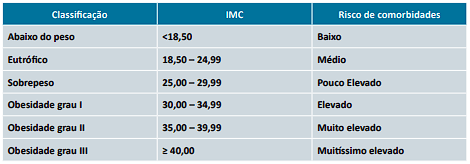

Imagem pode ser encontrada na [cartilha informativa sobre obesidade](https://www.gov.br/conitec/pt-br/midias/protocolos/resumidos/PCDTResumidodeSobrepesoObesidade.pdf.pdf) no portal do ministério da saúde, lembrando que o IMC não leva em conta outros fatores de extrema importância para atestar riscos à saúde como massa múscular, etnia, e demais outros.

## Correlação

A correlação é uma medida estatística que indica o grau de relação entre duas variáveis variado de [-1,1] nos mostra se as variáveis estão fortemente correlacionadas (1) ou fortemente inversamente correlacionadas(-1)

# Pré-Processamento de Dados

Como parte obrigatória do estudo iremos agora para o pré processamento voltado para a aplicação do modelo, nele iremos fazer mais algumas transformações, split entre teste e treino e as conclusões finais sobre as hipóteses levantadas.

Mesmo com a comprovação da baixa correlação entre as variáveis podemos aida aplicar modelos de **classificação não supervisionada**, ou outros tipos de modelos que possam adentrar mais nos ddados.

# **Aplicação do Modelo**

## Validação dos Resultados dos Modelos

# **Conclusão**

In [18]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mosapabdelghany/medical-insurance-cost-dataset")

print("Path to dataset files:", path)



Using Colab cache for faster access to the 'medical-insurance-cost-dataset' dataset.
Path to dataset files: /kaggle/input/medical-insurance-cost-dataset


Preparação de Dados

Objetivo: realizar operações de preparação dos dados.

Separe o dataset entre treino e teste (e validação, se aplicável).
Faz sentido utilizar um método de validação cruzada? Justifique se não utilizar.
Verifique quais operações de transformação de dados (como normalização e padronização, transformação de imagens em tensores) são mais apropriadas para o seu problema e salve visões diferentes do seu dataset para posterior avaliação dos modelos.
Refine a quantidade de atributos disponíveis, realizando o processo de feature selection de forma adequada.
Modelagem e treinamento:

Objetivo: construir modelos para resolver o problema em questão.

Selecione os algoritmos mais indicados para o problema e dataset escolhidos, justificando as suas escolhas.
Há algum ajuste inicial para os hiperparâmetros?
O modelo foi devidamente treinado? Foi observado problema de underfitting?
É possível otimizar os hiperparâmetros de algum dos modelos? Se sim, faça-o, justificando todas as escolhas.
Há algum método avançado ou mais complexo que possa ser avaliado?
Posso criar um comitê de modelos diferentes para o problema (ensembles)?
Avaliação de Resultados:

Objetivo: analisar o desempenho dos modelos gerados em dados não vistos (com a base de teste)

Selecione as métricas de avaliação condizentes com o problema, justificando.
Treine o modelo escolhido com toda a base de treino, e teste-o com a base de teste.
Os resultados fazem sentido?
Foi observado algum problema de overfitting?
Compare os resultados de diferentes modelos.
Descreva a melhor solução encontrada, justificando.